## 바이브코딩을 활용한 3차원 미사일 방어 시스템: 단계별 심화 문제

### 최종 도전: 불확실성 하의 실시간 위협 식별 및 요격
#### 상황: 
이제 가장 현실적인 최종 단계입니다. 미상의 위협이 영공을 침범했습니다. 우리는 이 미사일이 어떤 종류인지 모르지만, 아군 데이터베이스에는 적들이 사용하는 모든 미사일의 종류별 비행 패턴(궤도 함수)이 저장되어 있습니다. 실시간 관측 데이터만으로 위협의 정체를 신속하게 파악하고 즉시 요격해야 합니다.

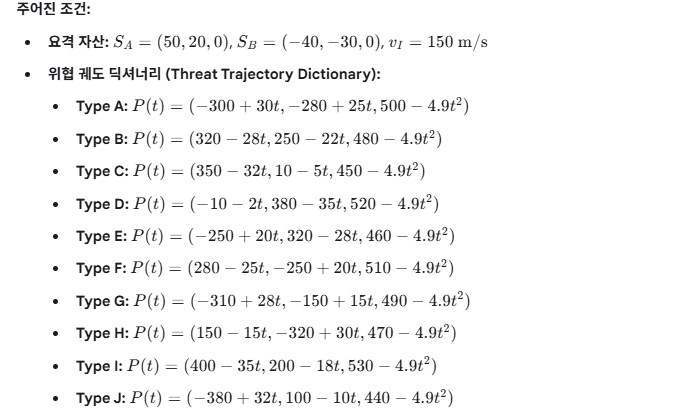

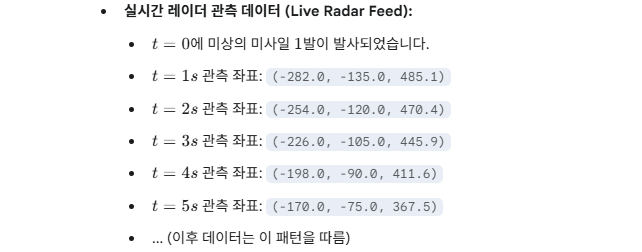

#### 최종 도전 과제:
#### 1. 위협 식별 알고리즘 구현:
- $t=1, 2, 3...$초마다 관측된 좌표와 '위협 딕셔너리'의 10개 궤도 함수 각각에 대한 누적 오차(Sum of Squared Errors)를 실시간으로 계산하는 로직을 구현하세요.
 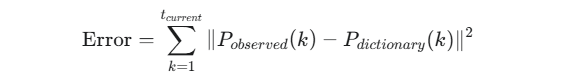
- 10개 타입별 누적 오차 값이 시간에 따라 어떻게 변하는지 실시간 그래프로 시각화하여 분석 대시보드를 만드세요.

#### 2. 의사결정 및 요격 계획 수립:
- 관측 시작 후 10초 이내에, 가장 가능성이 높은 위협(최소 오차 궤도)을 최종 확정하는 '의사결정' 로직을 구현하세요.
- 위협이 식별된 시점($t_{identify}$)을 기준으로, 아래 방정식을 풀어 최적의 요격 계획을 수립하세요.
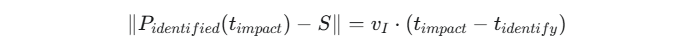


#### 3. 완전 자동 방어 시뮬레이션:
#### - 1단계 (관측/분석):
t=0부터 미확인 비행체가 나타나고 $t_{identify}$까지 오차 그래프가 변하는 모습을 보여줍니다.
#### - 2단계 (식별/결심): 
$t_{identify}$에 시스템이 위협 타입을 선언하고 요격 명령을 내리는 장면을 연출합니다.
#### - 3단계 (요격):
결정된 기지에서 요격탄이 발사되어 최종 $t_{impact}$에 충돌하는 모습을 시각화하여 알고리즘의 성공을 증명하세요.

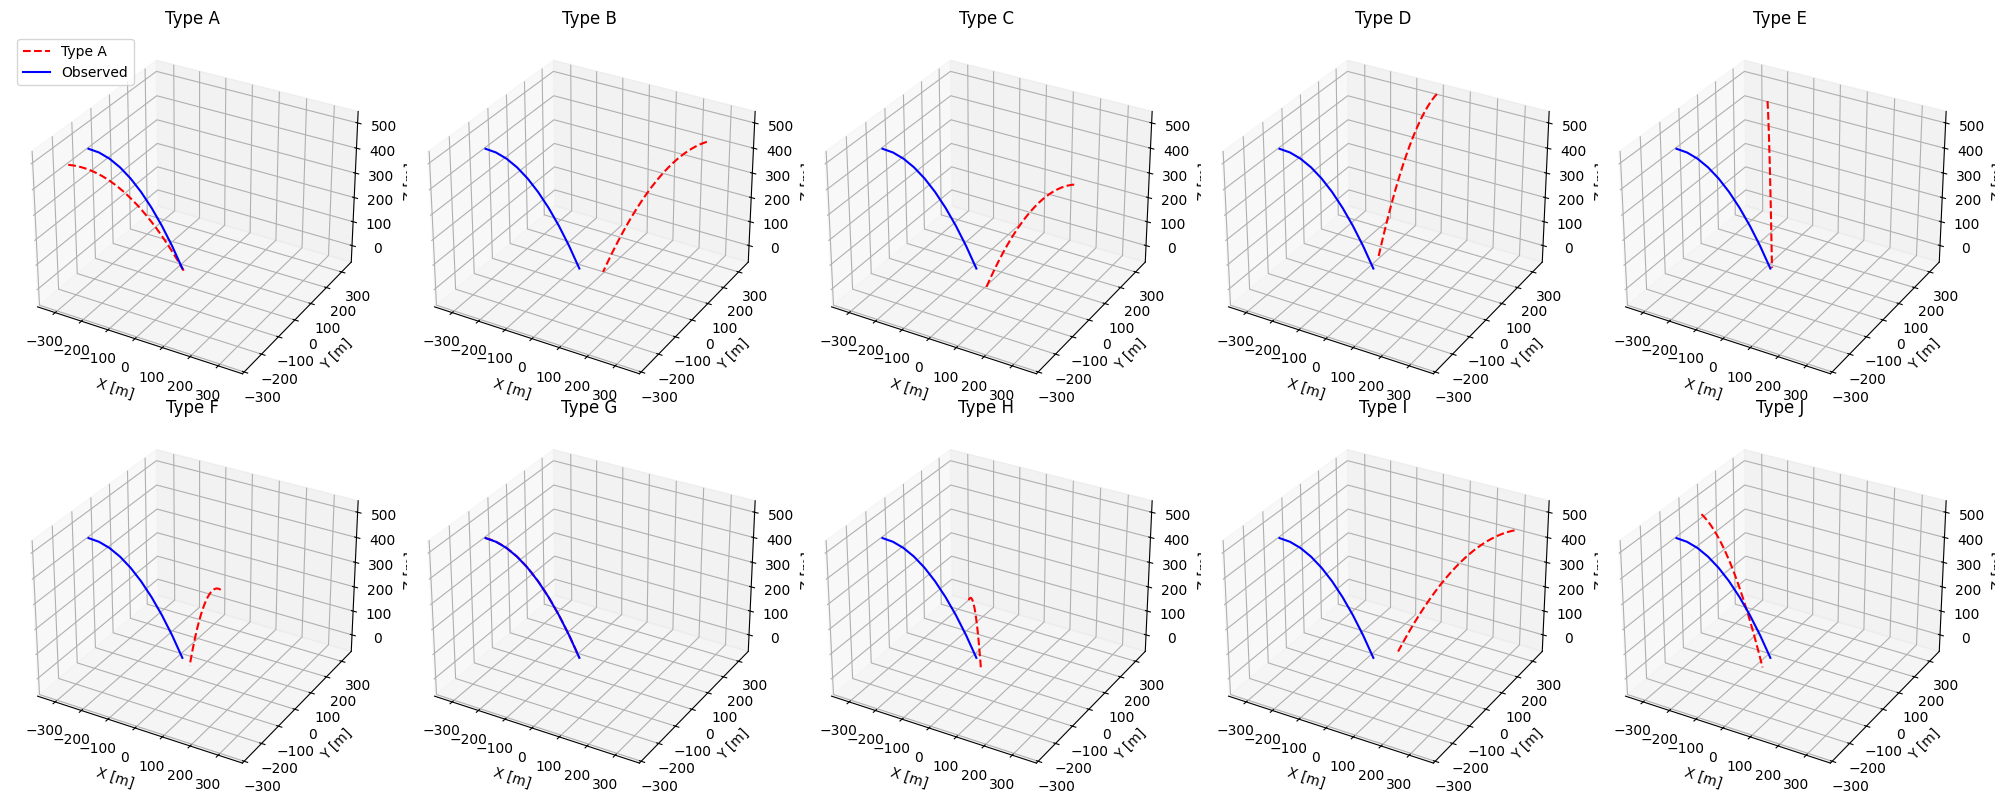

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 1) Define threat pattern functions A–J
g = 9.8
def pattern_A(t):
    return np.array([-300 + 30*t, -280 + 25*t, 500 - 4.9*t*t])
def pattern_B(t):
    return np.array([320 - 28*t, 250 - 22*t, 480 - 4.9*t*t])
def pattern_C(t):
    return np.array([350 - 32*t, 10 - 5*t, 450 - 4.9*t*t])
def pattern_D(t):
    return np.array([-10 - 2*t, 380 - 35*t, 520 - 4.9*t*t])
def pattern_E(t):
    return np.array([-250 + 20*t, 320 - 28*t, 460 - 4.9*t*t])
def pattern_F(t):
    return np.array([280 - 25*t, -250 + 20*t, 510 - 4.9*t*t])
def pattern_G(t):
    return np.array([-310 + 28*t, -150 + 15*t, 490 - 4.9*t*t])
def pattern_H(t):
    return np.array([150 - 15*t, -320 + 30*t, 470 - 4.9*t*t])
def pattern_I(t):
    return np.array([400 - 35*t, 200 - 18*t, 530 - 4.9*t*t])
def pattern_J(t):
    return np.array([-380 + 32*t, 100 - 10*t, 440 - 4.9*t*t])

patterns = [pattern_A, pattern_B, pattern_C, pattern_D, pattern_E,
            pattern_F, pattern_G, pattern_H, pattern_I, pattern_J]
pattern_labels = list("ABCDEFGHIJ")

# 2) Generate observed trajectory (Type G pattern) for t=1..10
obs_times = np.arange(1, 11)  # seconds
obs_traj = np.array([pattern_G(t) for t in obs_times])

# 3) Compute full threat trajectories over the same time span
times_fine = np.linspace(1, 10, 200)
threat_trajs = [np.array([P(t) for t in times_fine]) for P in patterns]

# 4) Determine axis limits across all data
all_points = np.vstack([obs_traj] + threat_trajs)
xmin, ymin, zmin = all_points.min(axis=0) - 20
xmax, ymax, zmax = all_points.max(axis=0) + 20

# 5) Create 2×5 subplots with identical axes
fig = plt.figure(figsize=(20, 8))
for i, (traj, label) in enumerate(zip(threat_trajs, pattern_labels), 1):
    ax = fig.add_subplot(2, 5, i, projection='3d')
    # threat pattern in red dashed
    ax.plot(traj[:, 0], traj[:, 1], traj[:, 2],
            'r--', label=f"Type {label}")
    # observed in blue solid
    ax.plot(obs_traj[:, 0], obs_traj[:, 1], obs_traj[:, 2],
            'b-', label="Observed")
    ax.set_title(f"Type {label}")
    ax.set_xlim(xmin, xmax)
    ax.set_ylim(ymin, ymax)
    ax.set_zlim(zmin, zmax)
    ax.set_xlabel("X [m]")
    ax.set_ylabel("Y [m]")
    ax.set_zlabel("Z [m]")
    if i == 1:
        ax.legend(loc='upper left')

plt.tight_layout()
plt.show()


Identified Threat: Type G at t = 3s


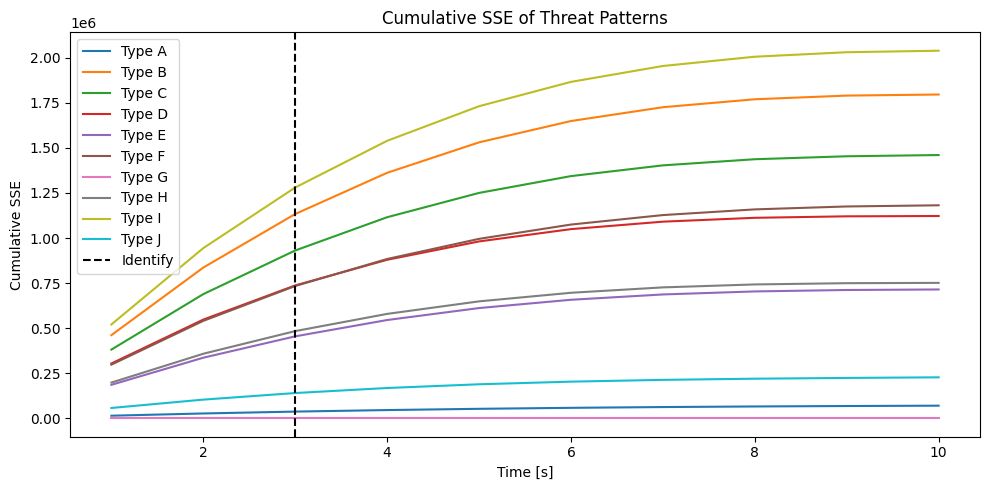

ValueError: f(a) and f(b) must have different signs

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import brentq

# 1) Define threat pattern functions A–J
g = 9.8
def pattern_A(t): return np.array([-300 + 30*t, -280 + 25*t, 500 - 4.9*t*t])
def pattern_B(t): return np.array([ 320 - 28*t,  250 - 22*t, 480 - 4.9*t*t])
def pattern_C(t): return np.array([ 350 - 32*t,   10 -  5*t, 450 - 4.9*t*t])
def pattern_D(t): return np.array([ -10 -  2*t,  380 - 35*t, 520 - 4.9*t*t])
def pattern_E(t): return np.array([-250 + 20*t,  320 - 28*t, 460 - 4.9*t*t])
def pattern_F(t): return np.array([ 280 - 25*t, -250 + 20*t, 510 - 4.9*t*t])
def pattern_G(t): return np.array([-310 + 28*t, -150 + 15*t, 490 - 4.9*t*t])
def pattern_H(t): return np.array([ 150 - 15*t, -320 + 30*t, 470 - 4.9*t*t])
def pattern_I(t): return np.array([ 400 - 35*t,  200 - 18*t, 530 - 4.9*t*t])
def pattern_J(t): return np.array([-380 + 32*t,  100 - 10*t, 440 - 4.9*t*t])

patterns = [pattern_A, pattern_B, pattern_C, pattern_D, pattern_E,
            pattern_F, pattern_G, pattern_H, pattern_I, pattern_J]
labels = list("ABCDEFGHIJ")

# 2) Live radar observations t=1..5 then continue G for t=6..10
obs_times = np.arange(1, 11)
obs_fixed = {
    1: np.array([-282.0, -135.0, 485.1]),
    2: np.array([-254.0, -120.0, 470.4]),
    3: np.array([-226.0, -105.0, 445.9]),
    4: np.array([-198.0,  -90.0, 411.6]),
    5: np.array([-170.0,  -75.0, 367.5]),
}
obs_traj = np.zeros((10,3))
for i, t in enumerate(obs_times):
    if t in obs_fixed:
        obs_traj[i] = obs_fixed[t]
    else:
        obs_traj[i] = pattern_G(t)

# 3) Compute cumulative SSE for each pattern at each time
errors = np.zeros((10, len(patterns)))
for i, t in enumerate(obs_times):
    for j, P in enumerate(patterns):
        pred = P(t)
        sq_err = np.sum((obs_traj[i] - pred)**2)
        errors[i, j] = (errors[i-1, j] if i>0 else 0) + sq_err

# 4) Decide threat: at first t>=3 or at t=10, pick j* minimizing SSE
for i in range(len(obs_times)):
    if i >= 2 or i == len(obs_times)-1:
        jstar = np.argmin(errors[i])
        t_identify = obs_times[i]
        break

print(f"Identified Threat: Type {labels[jstar]} at t = {t_identify}s")

# 5) Plot SSE curves
plt.figure(figsize=(10,5))
for j in range(10):
    plt.plot(obs_times, errors[:,j], label=f"Type {labels[j]}")
plt.axvline(t_identify, color='k', linestyle='--', label='Identify')
plt.xlabel("Time [s]")
plt.ylabel("Cumulative SSE")
plt.title("Cumulative SSE of Threat Patterns")
plt.legend()
plt.tight_layout()
plt.show()

# 6) Interceptor planning: choose base S_A
b = np.array([50, 20, 0])
v_int = 150.0
f = patterns[jstar]

# Root solve for impact time
def g_root(t):
    return np.linalg.norm(f(t) - b) - v_int*(t - t_identify)

t_impact = brentq(g_root, t_identify + 1e-3, t_identify + 100)
impact_point = f(t_impact)
v_vec = (impact_point - b) / (t_impact - t_identify)

print(f"t_impact = {t_impact:.2f}s")
print(f"Interceptor velocity vector = {v_vec}")

# 7) Plot trajectories
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')
# Threat predicted trajectory
times_fine = np.linspace(1, t_impact, 200)
th_traj = np.array([f(t) for t in times_fine])
ax.plot(th_traj[:,0], th_traj[:,1], th_traj[:,2], 'r--', label=f"Type {labels[jstar]} Traj")
# Observed
ax.scatter(obs_traj[:,0], obs_traj[:,1], obs_traj[:,2], c='b', label="Observed")
# Interceptor path
int_times = times_fine[times_fine>=t_identify]
int_traj = np.array([b + v_vec*(t - t_identify) for t in int_times])
ax.plot(int_traj[:,0], int_traj[:,1], int_traj[:,2], 'g-', label="Interceptor")
ax.scatter(*impact_point, c='k', marker='x', s=50, label="Impact")
ax.set_xlabel("X [m]"); ax.set_ylabel("Y [m]"); ax.set_zlabel("Z [m]")
ax.legend()
plt.title("Threat & Interceptor Trajectories")
plt.tight_layout()
plt.show()


In [4]:
import numpy as np
from scipy.optimize import brentq

# 식별 시점
t_identify = 3.0
# 기지 위치 및 요격탄 속도
b = np.array([50, 20, 0])
v_int = 150.0

# 패턴 함수 (Type G 예시)
def pattern_G(t):
    return np.array([-310 + 28*t, -150 + 15*t, 490 - 4.9*t*t])

# 방정식 정의
def g_root(t):
    return np.linalg.norm(pattern_G(t) - b) - v_int*(t - t_identify)

# 1) 전체 시간 구간을 촘촘히 샘플링하여 함수 값(f) 부호가 바뀌는 구간(브래킷)을 찾는다.
t_start = t_identify + 1e-3
t_end = t_identify + 100
times = np.linspace(t_start, t_end, 5000)
values = [g_root(t) for t in times]

bracket = None
for i in range(len(times)-1):
    if values[i] * values[i+1] < 0:
        bracket = (times[i], times[i+1])
        break

if bracket is None:
    raise RuntimeError("충돌 시점을 찾을 수 없습니다. 함수가 부호 변화하지 않습니다.")

# 2) 찾은 브래킷을 이용해 root-finding
t_a, t_b = bracket
t_impact = brentq(g_root, t_a, t_b)

print(f"충돌 시각 t_impact = {t_impact:.4f} s")


충돌 시각 t_impact = 5.6574 s
